In [2]:
import time
import os
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torchvision.models as models

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim

from Net import double 
from Mydataset import MyDataSet, ValDataSet

In [18]:
    test_transform = transforms.Compose(
            [transforms.Resize((32,32)),
           transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))])
    val_set = ValDataSet(test_transform)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=False)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(device)
    net = double()
    net = net.to(device)
    net.load_state_dict(torch.load("test.pth"))


cpu


<All keys matched successfully>

In [32]:
out = []
lab = []
with torch.no_grad():
    for data in val_loader:
            img1, img2, labels = data
            img1 = img1.to(device)
            img2 = img2.to(device)
            labels = labels.reshape(-1,1)
            labels = labels.to(device)
            outputs = net(img1, img2)
            out += outputs
            lab += labels

            #test_loss = criterion(outputs, labels)
            #total_test_loss[0] += test_loss.item()
            #total_test_loss[1] += 1

In [20]:
    src_transform = transforms.Compose(
            [transforms.Resize((32,32)),
           transforms.ToTensor()])
    src_set = ValDataSet(src_transform)
    src_loader = torch.utils.data.DataLoader(src_set, batch_size=32, shuffle=False)

tensor([13.4691])
tensor([18.])


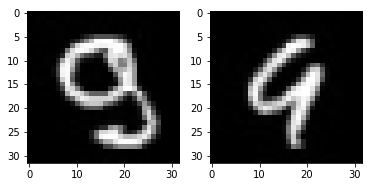

In [47]:
import os 
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
import matplotlib.pyplot as plt
ki = 99
plt.subplot(1,2,1)
plt.imshow(src_set[ki][0][0])
plt.subplot(1,2,2)
plt.imshow(src_set[ki][1][0])
print(out[ki])
print(lab[ki])
plt.gray()

###### print(*outputs)

In [24]:
print(labels)

tensor([[14.],
        [15.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.]])


800